In [33]:
import pandas as pd   
from pandas_datareader import data as web
import numpy as np   
import datetime as dt

import investpy as ipy #investing.com python library 

import warnings
warnings.filterwarnings('ignore')
    
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
btc = ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2012', to_date = '22/03/2021')
btc

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-01,4.7,5.5,4.6,5.3,108509,USD
2012-01-02,5.3,5.5,4.8,5.2,69151,USD
2012-01-03,5.2,5.3,4.7,4.9,125170,USD
2012-01-04,4.9,5.7,4.8,5.6,131171,USD
2012-01-05,5.6,7.2,5.6,6.9,182328,USD
...,...,...,...,...,...,...
2021-03-18,58911.8,60088.0,57099.6,57656.0,102624,USD
2021-03-19,57645.0,59448.3,56305.1,58088.0,83976,USD
2021-03-20,58084.1,59882.1,57863.0,58093.4,67826,USD


In [5]:
btc = btc.drop(columns = {'Volume', 'Currency'})

In [6]:
btc['Pct_Change']= btc['Close'].pct_change() * 100

In [99]:
btc_2020 = btc.loc['2020-01-01':]

Text(0.5, 1.0, 'BTC Daily Returns since 2020')

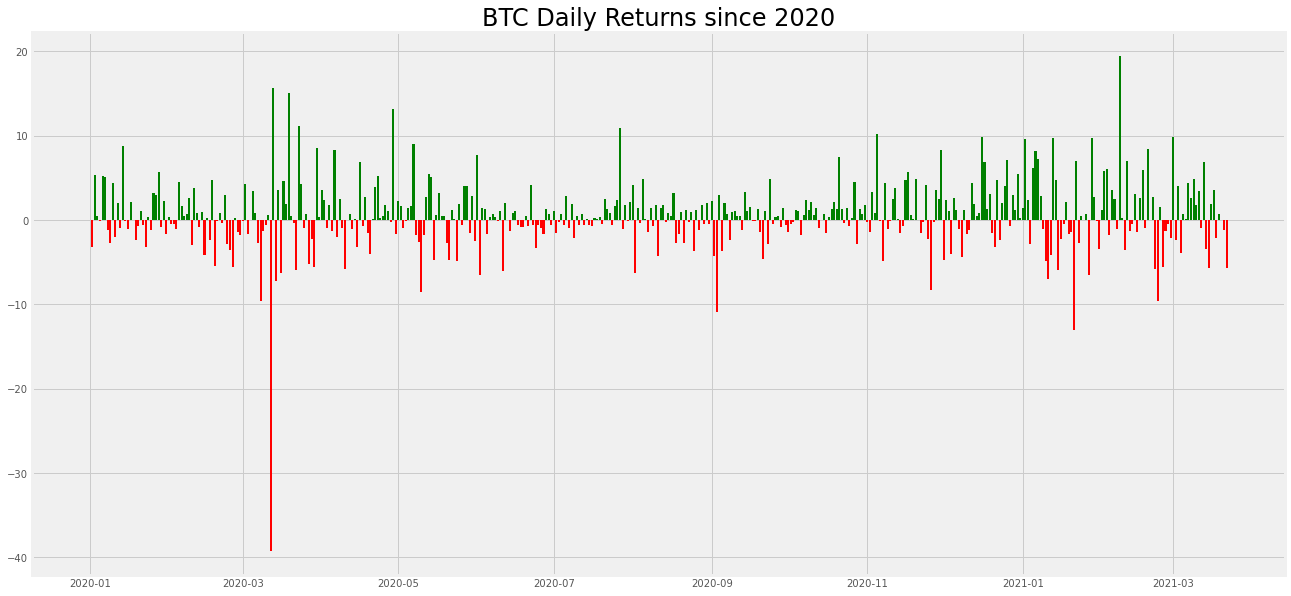

In [101]:
f, ax = plt.subplots(figsize=(20,10))

ax.bar(btc_2020.index, btc_2020['Pct_Change'], label='Daily Returns', color=(btc_2020['Pct_Change'] > 0).map({True: 'g', False: 'r'}))
ax.set_title('BTC Daily Returns since 2020', fontsize=24)

In [7]:
btc = btc.reset_index()

In [8]:
btc['DayOfWeek'] = btc['Date'].dt.dayofweek
btc

,Date,Open,High,Low,Close,Pct_Change,DayOfWeek
0,2012-01-01,4.7,5.5,4.6,5.3,NaN,6
1,2012-01-02,5.3,5.5,4.8,5.2,-1.886792,0
2,2012-01-03,5.2,5.3,4.7,4.9,-5.769231,1
3,2012-01-04,4.9,5.7,4.8,5.6,14.285714,2
4,2012-01-05,5.6,7.2,5.6,6.9,23.214286,3
...,...,...,...,...,...,...,...
3364,2021-03-18,58911.8,60088.0,57099.6,57656.0,-2.134485,3
3365,2021-03-19,57645.0,59448.3,56305.1,58088.0,0.749272,4
3366,2021-03-20,58084.1,59882.1,57863.0,58093.4,0.009296,5
3367,2021-03-21,58097.4,58583.8,55583.3,57383.8,-1.221481,6


In [9]:
btc=btc.set_index('Date')

In [10]:
def day_of_week(DayOfWeek):
    if DayOfWeek == 0:
        return 'Monday'
    elif DayOfWeek == 1:
        return 'Tuesday'
    elif DayOfWeek == 2:
        return 'Wednesday'
    elif DayOfWeek == 3:
        return 'Thursday'
    elif DayOfWeek == 4:
        return 'Friday'
    elif DayOfWeek == 5:
        return 'Saturday'
    elif DayOfWeek == 6:
        return 'Sunday'

btc['WeekDay'] = btc['DayOfWeek'].apply(day_of_week)

In [11]:
btc = btc.drop(columns={'DayOfWeek'})

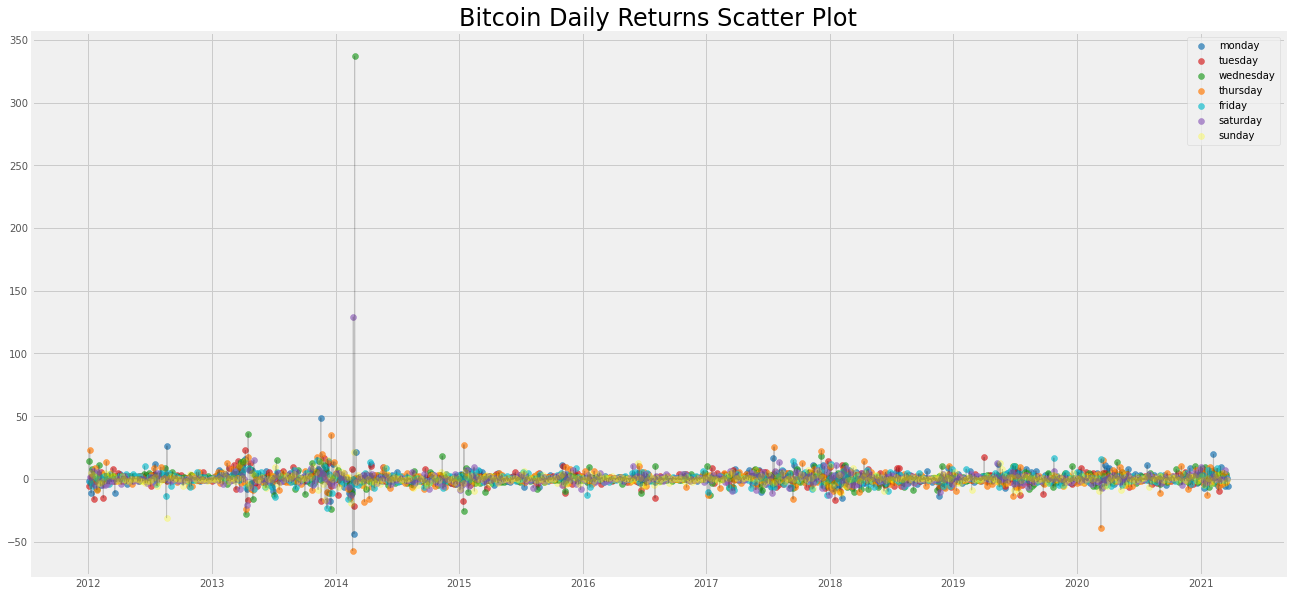

In [83]:
f, ax = plt.subplots(figsize=(20,10)) 

ax.plot(btc['Pct_Change'], lw=1, color='black', alpha=.2)
ax.scatter(y = btc_mon['Pct_Change'], x = btc_mon.index, alpha= .7, color ='tab:blue', label = 'monday')
ax.scatter(y = btc_tues['Pct_Change'], x = btc_tues.index, alpha= .7, color ='tab:red', label='tuesday')
ax.scatter(y = btc_wed['Pct_Change'], x = btc_wed.index, alpha= .7, color ='tab:green', label='wednesday')
ax.scatter(y = btc_thur['Pct_Change'], x = btc_thur.index, alpha= .7, color ='tab:orange', label='thursday')
ax.scatter(y = btc_fri['Pct_Change'], x = btc_fri.index, alpha= .7, color ='tab:cyan', label='friday')
ax.scatter(y = btc_sat['Pct_Change'], x = btc_sat.index, alpha= .7, color ='tab:purple', label='saturday')
ax.scatter(y = btc_sun['Pct_Change'], x = btc_sun.index, alpha= .3, color ='yellow', label='sunday')

ax.set_title('Bitcoin Daily Returns Scatter Plot', fontsize=24)
ax.legend()

In [42]:
btc_mon = btc[btc['WeekDay'] == 'Monday']
btc_tues = btc[btc['WeekDay'] == 'Tuesday']
btc_wed = btc[btc['WeekDay'] == 'Wednesday']
btc_thur = btc[btc['WeekDay'] == 'Thursday']
btc_fri = btc[btc['WeekDay'] == 'Friday']
btc_sat = btc[btc['WeekDay'] == 'Saturday']
btc_sun = btc[btc['WeekDay'] == 'Sunday']

In [17]:
btc_rets_mon = btc['Pct_Change'][btc['WeekDay']=='Monday'].mean()
btc_rets_tues = btc['Pct_Change'][btc['WeekDay']=='Tuesday'].mean()
btc_rets_wed = btc['Pct_Change'][btc['WeekDay']=='Wednesday'].mean()
btc_rets_thur = btc['Pct_Change'][btc['WeekDay']=='Thursday'].mean()
btc_rets_fri = btc['Pct_Change'][btc['WeekDay']=='Friday'].mean()
btc_rets_sat = btc['Pct_Change'][btc['WeekDay']=='Saturday'].mean()
btc_rets_sun = btc['Pct_Change'][btc['WeekDay']=='Sunday'].mean()

In [26]:
btc_rets_mean = btc['Pct_Change'].mean()

In [27]:
btc_rets_mon = np.round(btc_rets_mon, 3)
btc_rets_tues = np.round(btc_rets_tues, 3)
btc_rets_wed = np.round(btc_rets_wed, 3)
btc_rets_thur = np.round(btc_rets_thur, 3)
btc_rets_fri = np.round(btc_rets_fri, 3)
btc_rets_sat = np.round(btc_rets_sat, 3)
btc_rets_sun = np.round(btc_rets_sun, 3)
btc_rets_mean = np.round(btc_rets_mean, 3)

In [28]:
print(f' The Bitcoin Average Returns on Monday is {btc_rets_mon}%')
print(f' The Bitcoin Average Returns on Tueday is {btc_rets_tues}%')
print(f' The Bitcoin Average Returns on Wednesday is {btc_rets_wed}%')
print(f' The Bitcoin Average Returns on Thursday is {btc_rets_thur}%')
print(f' The Bitcoin Average Returns on Friday is {btc_rets_fri}%')
print(f' The Bitcoin Average Returns on Saturday is {btc_rets_sat}%')
print(f' The Bitcoin Average Returns on Sunday is {btc_rets_sun}%')
print(f' The Bitcoin Daily Average Returns is {btc_rets_mean}%')

 The Bitcoin Average Returns on Monday is 1.0%
 The Bitcoin Average Returns on Tueday is 0.41%
 The Bitcoin Average Returns on Wednesday is 1.077%
 The Bitcoin Average Returns on Thursday is 0.173%
 The Bitcoin Average Returns on Friday is 0.26%
 The Bitcoin Average Returns on Saturday is 0.412%
 The Bitcoin Average Returns on Sunday is 0.06%
 The Bitcoin Daily Average Returns is 0.462%


In [29]:
# create a df for plotting
data = {'Day': ['Monday', 'Tuesay', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Average'], 
        'Average Returns':[btc_rets_mon,btc_rets_tues,btc_rets_wed, btc_rets_thur,
                          btc_rets_fri, btc_rets_sat, btc_rets_sun, btc_rets_mean]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
df 

,Day,Average Returns
0,Monday,1.000
1,Tuesay,0.410
2,Wednesday,1.077
3,Thursday,0.173
4,Friday,0.260
5,Saturday,0.412
6,Sunday,0.060
7,Average,0.462


In [30]:
df = df.set_index('Day')

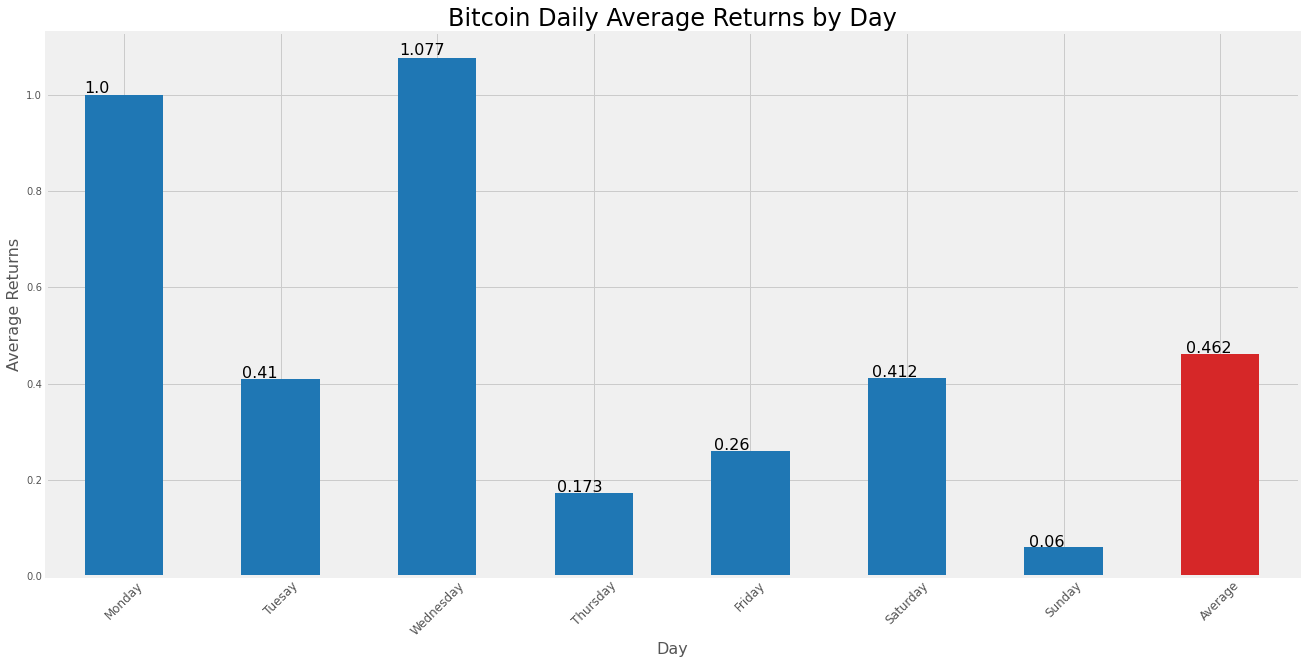

In [34]:
f,ax=plt.subplots(figsize=(20,10))

df['Average Returns'].plot.bar(color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue',
                                     'tab:blue', 'tab:blue', 'tab:blue', 'tab:red'])
ax.set_title('Bitcoin Daily Average Returns by Day', fontsize = 24)
ax.set_xlabel('Day', fontsize = 16)
ax.set_ylabel('Average Returns', fontsize = 16)
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

In [70]:
btc_mon_20 = btc_mon.loc['2020-01-01':]
btc_tues_20 = btc_tues.loc['2020-01-01':]
btc_wed_20 = btc_wed.loc['2020-01-01':]
btc_thur_20 = btc_thur.loc['2020-01-01':]
btc_fri_20 = btc_fri.loc['2020-01-01':]
btc_sat_20 = btc_sat.loc['2020-01-01':]
btc_sun_20 = btc_sun.loc['2020-01-01':]

Text(0.5, 1.0, 'BTC Daily Returns since 2020 by week day')

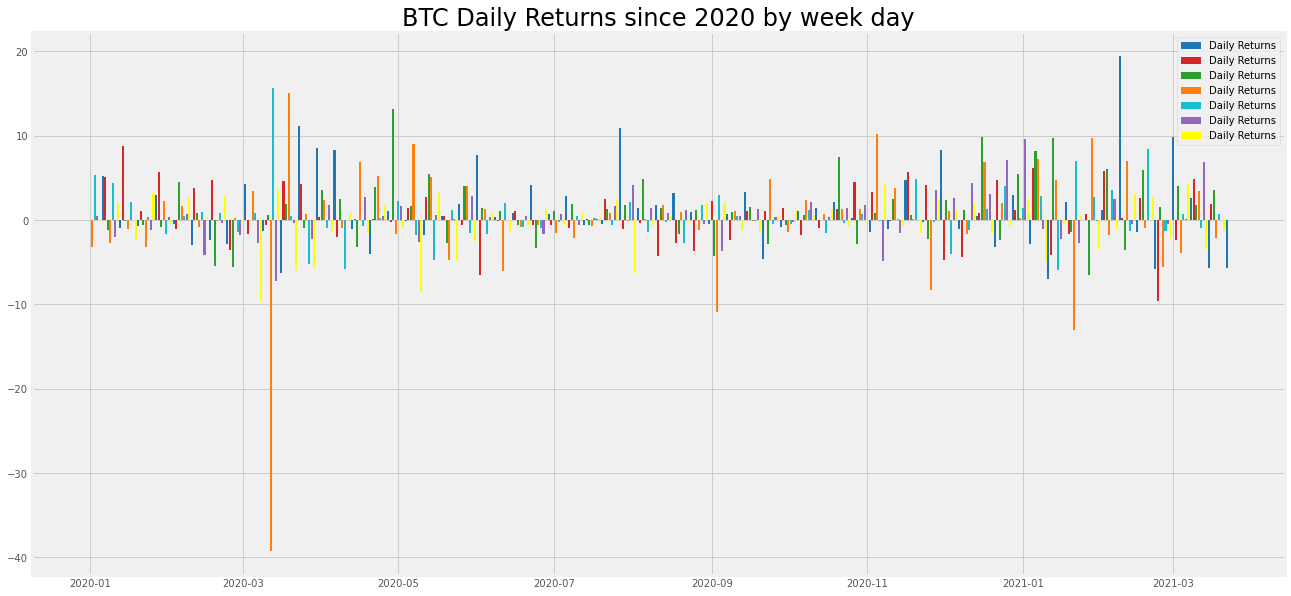

In [104]:
f, ax = plt.subplots(figsize=(20,10))

ax.bar(btc_mon_20.index, btc_mon_20['Pct_Change'], label='Daily Returns', color = 'tab:blue')
ax.bar(btc_tues_20.index, btc_tues_20['Pct_Change'], label='Daily Returns', color = 'tab:red')
ax.bar(btc_wed_20.index, btc_wed_20['Pct_Change'], label='Daily Returns', color = 'tab:green')
ax.bar(btc_thur_20.index, btc_thur_20['Pct_Change'], label='Daily Returns', color = 'tab:orange')
ax.bar(btc_fri_20.index, btc_fri_20['Pct_Change'], label='Daily Returns', color = 'tab:cyan')
ax.bar(btc_sat_20.index, btc_sat_20['Pct_Change'], label='Daily Returns', color = 'tab:purple')
ax.bar(btc_sun_20.index, btc_sun_20['Pct_Change'], label='Daily Returns', color = 'yellow')
ax.legend(loc='best')
ax.set_title('BTC Daily Returns since 2020 by week day', fontsize=24)

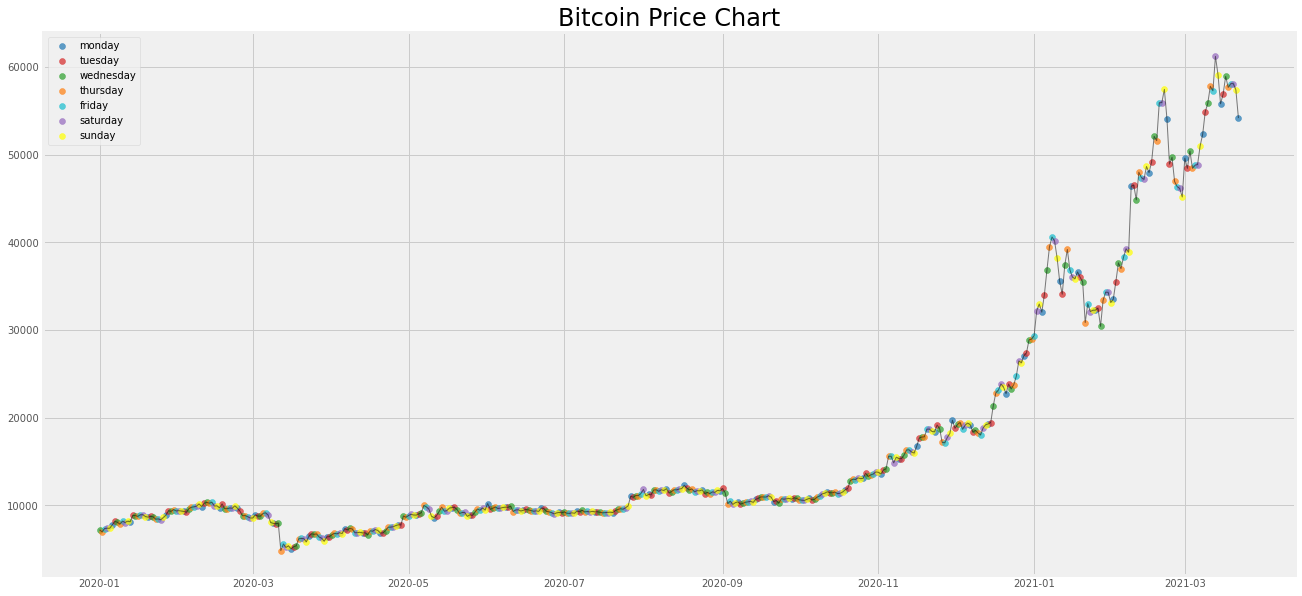

In [77]:
f, ax = plt.subplots(figsize=(20,10))

ax.plot(btc1['Close'], lw=1, color='black', alpha =.5)
ax.scatter(y = btc_mon_20['Close'], x = btc_mon_20.index, alpha= .7, color ='tab:blue', label = 'monday')
ax.scatter(y = btc_tues_20['Close'], x = btc_tues_20.index, alpha= .7, color ='tab:red', label='tuesday')
ax.scatter(y = btc_wed_20['Close'], x = btc_wed_20.index, alpha= .7, color ='tab:green', label='wednesday')
ax.scatter(y = btc_thur_20['Close'], x = btc_thur_20.index, alpha= .7, color ='tab:orange', label='thursday')
ax.scatter(y = btc_fri_20['Close'], x = btc_fri_20.index, alpha= .7, color ='tab:cyan', label='friday')
ax.scatter(y = btc_sat_20['Close'], x = btc_sat_20.index, alpha= .7, color ='tab:purple', label='saturday')
ax.scatter(y = btc_sun_20['Close'], x = btc_sun_20.index, alpha= .7, color ='yellow', label='sunday')

ax.set_title('Bitcoin Price Chart', fontsize=24)
ax.legend()